In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [2]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


###CHECKING IF DATA IS GOOD, IF FEATURES NEEDS ENCODING AND CHECKING FOR LINEAR RELATIONSHIP B/W FEATURE AND OUTPUT

In [3]:
df.shape


(52, 6)

In [4]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [5]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [6]:
df.duplicated(keep='first')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
dtype: bool

In [7]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

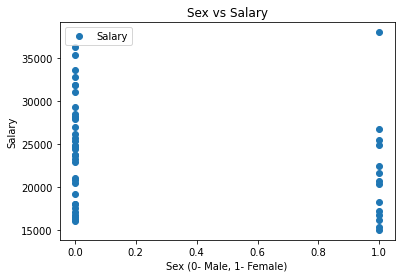

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [8]:
df.plot(x='Sex', y='Salary', style='o')
#df.groupby('Sex')['Salary'].mean().plot()

plt.title('Sex vs Salary')
plt.xlabel('Sex (0- Male, 1- Female)')
plt.ylabel('Salary')
plt.show()

df[['Sex','Salary']].corr()

There is a low linear relationshp between the data.

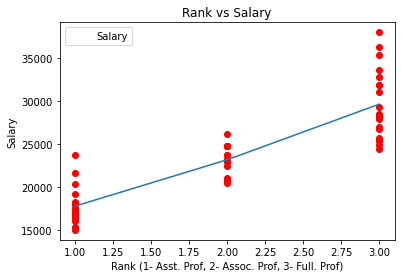

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [9]:
df.plot(x='Rank', y='Salary', style='or')
df.groupby('Rank')['Salary'].mean().plot()

plt.title('Rank vs Salary')
plt.xlabel('Rank (1- Asst. Prof, 2- Assoc. Prof, 3- Full. Prof)')
plt.ylabel('Salary')
plt.show()

df[['Rank','Salary']].corr()

There is a high correlation (+ve linear relationshp) between the data. It is found that Higher the Professor's tenure position in the College, higer is their pay. 

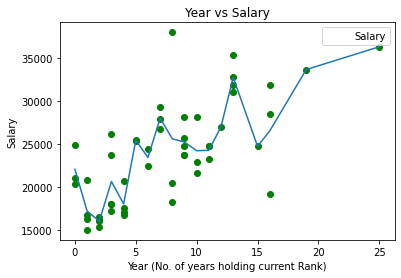

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [10]:
df.plot(x='Year', y='Salary', style='og')
df.groupby('Year')['Salary'].mean().plot()

plt.title('Year vs Salary')
plt.xlabel('Year (No. of years holding current Rank)')
plt.ylabel('Salary')
plt.show()

df[['Year','Salary']].corr()

There is a high correlation (+ve linear relationshp) between the data. It is found that More the number of Years a Professor holds their current position,their pay gets increased. 

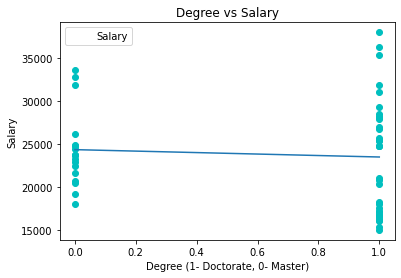

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [11]:
df.plot(x='Degree', y='Salary', style='oc')
df.groupby('Degree')['Salary'].mean().plot()

plt.title('Degree vs Salary')
plt.xlabel('Degree (1- Doctorate, 0- Master)')
plt.ylabel('Salary')
plt.show()

df[['Degree','Salary']].corr()

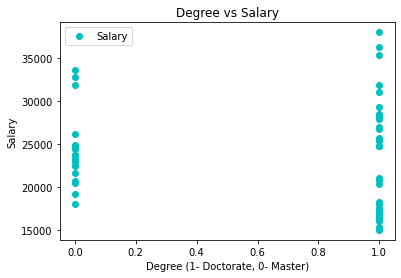

,Degree_square,Salary
Degree_square,1.000000,-0.069726
Salary,-0.069726,1.000000


In [12]:
df['Degree_square'] = np.square(df['Degree'])

df.plot(x='Degree_square', y='Salary', style='oc')
plt.title('Degree vs Salary')
plt.xlabel('Degree (1- Doctorate, 0- Master)')
plt.ylabel('Salary')
plt.show()

df[['Degree_square','Salary']].corr()

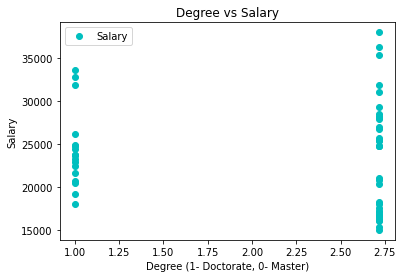

,Degree_exponential,Salary
Degree_exponential,1.000000,-0.069726
Salary,-0.069726,1.000000


In [13]:
df['Degree_exponential'] = np.exp(df['Degree'])

df.plot(x='Degree_exponential', y='Salary', style='oc')
plt.title('Degree vs Salary')
plt.xlabel('Degree (1- Doctorate, 0- Master)')
plt.ylabel('Salary')
plt.show()

df[['Degree_exponential','Salary']].corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


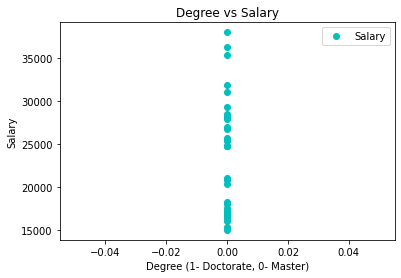

,logOf_Degree,Salary
logOf_Degree,NaN,NaN
Salary,NaN,1.0


In [14]:
df['logOf_Degree'] = np.log(df['Degree'])

df.plot(x='logOf_Degree', y='Salary', style='oc')
plt.title('Degree vs Salary')
plt.xlabel('Degree (1- Doctorate, 0- Master)')
plt.ylabel('Salary')
plt.show()

df[['logOf_Degree','Salary']].corr()

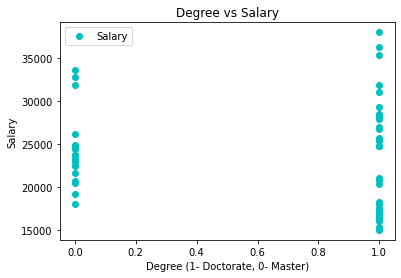

,Degree_SqRt,Salary
Degree_SqRt,1.000000,-0.069726
Salary,-0.069726,1.000000


In [15]:
df['Degree_SqRt'] = np.sqrt(df['Degree'])

df.plot(x='Degree_SqRt', y='Salary', style='oc')
plt.title('Degree vs Salary')
plt.xlabel('Degree (1- Doctorate, 0- Master)')
plt.ylabel('Salary')
plt.show()

df[['Degree_SqRt','Salary']].corr()

1) There is no correlation between Degree and Salary - hence cannot be considered for Linear regression

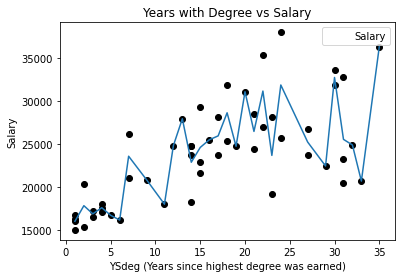

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [16]:
df.plot(x='YSdeg', y='Salary', style='ok')
df.groupby('YSdeg')['Salary'].mean().plot()

plt.title('Years with Degree vs Salary')
plt.xlabel('YSdeg (Years since highest degree was earned)')
plt.ylabel('Salary')
plt.show()

df[['YSdeg','Salary']].corr()

There is a high correlation (+ve linear relationshp) between the data.

###**TASK 1**
Find the linear regression equation for this data using columns 1-5 to column 6.


In [17]:
from sklearn.model_selection import train_test_split

X = df.loc[ :, ['Sex','Rank','Year','Degree','YSdeg']].values
Y = df['Salary'].values
#X
#Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) #random_state can be added if wanted 
#Y_test

from sklearn.preprocessing import StandardScaler ## standrard scaling 

scaler = StandardScaler() #initialise to a variable

scaler.fit(X_train,Y_train) #fit finds mean, std-deviation. 
    #NOTE: WE CAN ONLY FIND MEAN AND STANDARD DEVIATION FOR SCALING AND NORMALIZATION WITH TRAINING DATA

X_train_scaled = scaler.transform(X_train) # normalizing the training data

X_test_scaled = scaler.transform(X_test) # normalizing the test data 
#X_train_scaled
#-----------------------------------

from sklearn.linear_model import LinearRegression #IMPORTING

regressor = LinearRegression()  #INITIALIZATION

regressor.fit(X_train_scaled, Y_train)  #FITTING

#---------------------------------------

#PREDICTING OUTPUT FOR GIVEN TEST FEATURE DATA

Y_pred = regressor.predict(X_test_scaled)
#Y_pred

In [18]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1

,Actual,Predicted
0,24800,24540.957904
1,16244,15940.399077
2,23712,23471.743067
3,35350,29936.246174
4,18000,17225.480789
5,15350,17595.736429
6,20525,22439.005452
7,16500,16153.142579
8,28200,28675.275108
9,16700,16851.960955


In [19]:
#y = m1 * x1 + m2 * x2 + m3 * x3 + m4 * x4 + m5 * x5 + c

print("Predicted Salary (Y) = {} * Sex(x1) + {} * Rank(x2) + {} * Year(x3) + {} * Degree(x4) + {} *  YSdeg(x5) + {}".
      format(regressor.coef_[0],regressor.coef_[1],regressor.coef_[2],regressor.coef_[3],regressor.coef_[4],regressor.intercept_))

Predicted Salary (Y) = 601.5657951671382 * Sex(x1) + 4715.560027017018 * Rank(x2) + 2768.156874847814 * Year(x3) + -806.7446026184541 * Degree(x4) + -1327.7610388252374 *  YSdeg(x5) + 24452.916666666668


In [20]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(Y_test,Y_pred))  #R2- Score for Sex, Rank, Years, Degree, YsDegree output- Salary

R2- SCORE: 0.8829551321617435


###**TASK 2**
Find the selection of columns with the best  R2  score.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ## standrard scaling
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import random
import itertools

def findMaxR2Score():
  features= ['Sex','Rank','Year','Degree','YSdeg']
  #dict_of_r2scores= {}
  rand_st= random.randint(1, 50)
  maxR2Score= 0
  maxFeature = []

  for i in range(0, len(features)+1):
    for combo in itertools.combinations(features, i): #feature in features
      if len(combo) > 0:

        X= df.loc[:, list(combo)].values
        Y= df['Salary'].values

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state= rand_st) #Random state has been added,
                                                                                                        #to get the same cobination of data for each iteration
        
        #----------------------------------------
        scaler = StandardScaler() #initialise to a variable
        
        scaler.fit(X_train,Y_train) #fit finds mean, std-deviation. 
            #NOTE: WE CAN ONLY FIND MEAN AND STANDARD DEVIATION FOR SCALING AND NORMALIZATION WITH TRAINING DATA
        
        X_train_scaled = scaler.transform(X_train) # normalizing the training data
        X_test_scaled = scaler.transform(X_test) # normalizing the test data
        #-----------------------------------------

        regressor1 = LinearRegression()  #INITIALIZATION
        regressor1.fit(X_train_scaled, Y_train)  #FITTING

        Y_pred = regressor1.predict(X_test_scaled)

        #-----------------------------------------

        if metrics.r2_score(Y_test,Y_pred) > maxR2Score:   #R2- Score
          maxR2Score= metrics.r2_score(Y_test,Y_pred)
          maxFeature= list(combo)
        #dict_of_r2scores[str(list(combo))] = metrics.r2_score(Y_test,Y_pred)

  print("Maximum R2 Score is for",maxFeature," and the R2 Score is:", maxR2Score)
  #for k in dict_of_r2scores.keys():
    #print(k,":", dict_of_r2scores[k])

#findMaxR2Score()

In [22]:
findMaxR2Score()

Maximum R2 Score is for ['Rank', 'Year', 'Degree', 'YSdeg']  and the R2 Score is: 0.8482309608095633


###**TASK 3**
Report whether sex is a factor in salary.

In [23]:
import seaborn as sns

Total no. of Records:  52
Toatal no. of Woman professors (represented by 1) to Men professors (represented by 0):
0    38
1    14
Name: Sex, dtype: int64


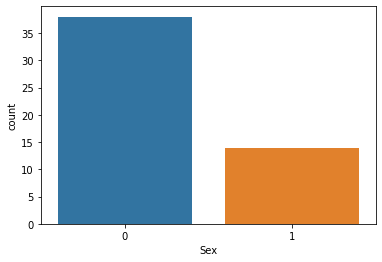

In [24]:
print("Total no. of Records: ", df['Sex'].count())
print("Toatal no. of Woman professors (represented by 1) to Men professors (represented by 0):")
print(df.Sex.value_counts())

sns.countplot(x="Sex", data=df)

As we can see the total number of Female Professors is less than half of the total number of Male Professors. 

In [25]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


There is also a very low CORRELATION BETWEEN SEX AND SALARY

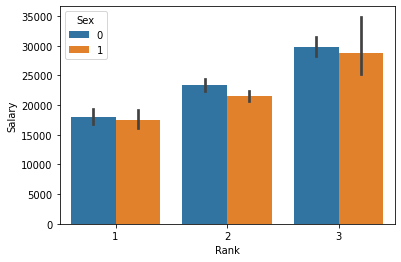

In [26]:
sns.barplot(x=df['Rank'], y= df['Salary'], hue=df['Sex'], data=df)


We can also see that the On the basis of their rank the Average Salary a Male Professor earns is not much different from what a Female Professor receives

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ## standrard scaling
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import random
import itertools

def findMaxR2Score():
  features= ['Sex','Rank','Year','Degree','YSdeg']
  f = []
  dict_of_r2scores= {}
  rand_st= random.randint(1, 50)

  for i in range(0, len(features)+1):
    for combo in itertools.combinations(features, i): #feature in features
      if len(combo) > 0:

        X= df.loc[:, list(combo)].values
        Y= df['Salary'].values

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state= rand_st) #Random state has been added,
                                                                                                        #to get the same cobination of data for each iteration
        
        #----------------------------------------
        scaler = StandardScaler() #initialise to a variable
        
        scaler.fit(X_train,Y_train) #fit finds mean, std-deviation. 
            #NOTE: WE CAN ONLY FIND MEAN AND STANDARD DEVIATION FOR SCALING AND NORMALIZATION WITH TRAINING DATA
        
        X_train_scaled = scaler.transform(X_train) # normalizing the training data
        X_test_scaled = scaler.transform(X_test) # normalizing the test data
        #-----------------------------------------

        regressor1 = LinearRegression()  #INITIALIZATION
        regressor1.fit(X_train_scaled, Y_train)  #FITTING

        Y_pred = regressor1.predict(X_test_scaled)

        #-----------------------------------------

        dict_of_r2scores[str(list(combo))] = metrics.r2_score(Y_test,Y_pred)

  for k in dict_of_r2scores.keys():
    print(k,":", dict_of_r2scores[k])

findMaxR2Score()

['Sex'] : -0.015070400393590644
['Rank'] : 0.830674991646336
['Year'] : 0.49347735770405887
['Degree'] : -0.15710279899337665
['YSdeg'] : 0.5394339519792966
['Sex', 'Rank'] : 0.8120608508829188
['Sex', 'Year'] : 0.40648892978076256
['Sex', 'Degree'] : -0.03519861727811713
['Sex', 'YSdeg'] : 0.5849286123401953
['Rank', 'Year'] : 0.8938305493666452
['Rank', 'Degree'] : 0.8360665127974665
['Rank', 'YSdeg'] : 0.8474077536238224
['Year', 'Degree'] : 0.4348672718880332
['Year', 'YSdeg'] : 0.6336810183888858
['Degree', 'YSdeg'] : 0.5702703146574364
['Sex', 'Rank', 'Year'] : 0.8932027746477682
['Sex', 'Rank', 'Degree'] : 0.8154929677387259
['Sex', 'Rank', 'YSdeg'] : 0.8276112273895946
['Sex', 'Year', 'Degree'] : 0.3280591246750374
['Sex', 'Year', 'YSdeg'] : 0.6182175144239319
['Sex', 'Degree', 'YSdeg'] : 0.6278210671730434
['Rank', 'Year', 'Degree'] : 0.8894577972646389
['Rank', 'Year', 'YSdeg'] : 0.8844268500221238
['Rank', 'Degree', 'YSdeg'] : 0.8474458867932593
['Year', 'Degree', 'YSdeg'] :

It is also worth noting that R2 Score for the SEX- SALARY Linear regression model is less or very close to zero, indicating that it has SEX no direct influence on salary.

In [28]:
from sklearn.model_selection import train_test_split

X = df.loc[ :, ['Sex','Rank','Year','Degree','YSdeg']].values
Y = df['Salary'].values
#X
#Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) #random_state can be added if wanted 
#Y_test

from sklearn.preprocessing import StandardScaler ## standrard scaling 

scaler = StandardScaler() #initialise to a variable

scaler.fit(X_train,Y_train) #fit finds mean, std-deviation. 
    #NOTE: WE CAN ONLY FIND MEAN AND STANDARD DEVIATION FOR SCALING AND NORMALIZATION WITH TRAINING DATA

X_train_scaled = scaler.transform(X_train) # normalizing the training data

X_test_scaled = scaler.transform(X_test) # normalizing the test data 
#X_train_scaled
#-----------------------------------

from sklearn.linear_model import LinearRegression #IMPORTING

regressor = LinearRegression()  #INITIALIZATION

regressor.fit(X_train_scaled, Y_train)  #FITTING

#---------------------------------------

#PREDICTING OUTPUT FOR GIVEN TEST FEATURE DATA

Y_pred = regressor.predict(X_test_scaled)
#Y_pred

In [29]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex','Rank','Year','Degree','YSdeg'], columns=['Coefficient'])
coeff_df

,Coefficient
Sex,816.697279
Rank,4357.508734
Year,2799.951253
Degree,-598.418176
YSdeg,-1233.333306


From the absolute values of Coefficient for the selected columns, we can infer that :
1. it is actually the Rank (I) and the The no. of Years (II) that has the most importance. From the above we can even see that the R2 Scores for ['Rank', 'Year'] - SALARY IS VERY HIGH.

2. The absolute value of Coefficiet for Sex keeps varying from being 3rd in importance to even being LAST in importance.


In [30]:
#FORMULA: PREDICTED SALARY(Y) = regressor.predict([[SEX,RANK,YEAR,DEGREE,YSdgree]])
#Sex. 1 for female, 0 for male.
#Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
#Year. Number of years in current rank.
#Degree. 0 for master's, 1 for doctorate, .
#YSdeg. Years since highest degree was earned.

Y_pred_FOR_MALEPROF = regressor.predict([[0,1,3,0,2]])
print("Approx salary for Male Assistant Professor of 3 years, having Masters degree since 2 Years:", Y_pred_FOR_MALEPROF)

Y_pred_FOR_FEMALEPROF = regressor.predict([[1,1,3,0,2]])
print("Approx salary for Female Assistant Professor of 3 years, having Masters degree since 2 Years:", Y_pred_FOR_FEMALEPROF)

Approx salary for Male Assistant Professor of 3 years, having Masters degree since 2 Years: [34364.41810293]
Approx salary for Female Assistant Professor of 3 years, having Masters degree since 2 Years: [35181.11538146]


Finally From a sample input of Male Professor data vs Female Professor data and predicting their Salary, we can see the Both of them receive almost same Salary.

HENCE WE CAN INFER THAT SEX IS NOT AN IMPORTANT FACTOR TO DETERMINE THE SALARY OF THE PROFESSOR.